In [2]:
import pandas as pd
import numpy as np

In [3]:
import sys
import os

# Get the path to the parent directory
# '..' means "go up one level"
sys.path.append(os.path.abspath(".."))

# NOW you can import the file from the parent folder
from flatness_score import calculate_flatness, get_hamming_distance, get_neighbors, generate_sequences

In [5]:
df = pd.read_csv('../data_yeast/ABF1_with_Metadata.csv')
df = df[df['Environment'] == 'YPD']
df['Sequence_80bp'].value_counts()

Sequence_80bp
CTGGAAATTCTAATGGAAAACCAATGCTGGATGTGGATGACAATGAAATAAATACAAAGAAGTACCAAACACCTAAATAT    938
CTGGAAATTCTAATGGAAAACCAATGCTGGATGTGGATGACAATGAAATAAATACAAAGAAGCACCAAACACCTAAATAT     35
CTGGAAATTCTAATGGAAAACCAATGCTGGCTGTGGATGACAATGAAATAAATACAAAGAAGTACCAAACACCTAAATAT     23
CTGGAAATTCTAATGGAAAACCAATGCTGGATGTGGATGACACTGAAATAAATACAAAGAAGTACCAAACACCTAAATAT      5
CTGGAAATTCTAATGGAAAACCAATGCTGGATGTGGATGACAATGAAATAAATACAAAGAAGCACCAAACACGTAAATAT      4
CTGGAAATTCTAATGGAAAACCAATGCTGGATGTGGATGAAAATGAAATAAATACAAAGAAGTACCAAACACCTAAATAT      3
CTGGAAATTCTAATGGAAAACCAATGCTGGATGTGGATGACAATGAAATAAATACGAAGAAGTACCAAACACCTAAATAT      2
CTGGAAATTCTAATGGAAAACCAATGCTGGATGTGGGTGACAATGAAATAAATACAAAGAAGTACCAAACACCTAAATAT      1
Name: count, dtype: int64

In [6]:
init_seq_list = df['Sequence_80bp'].unique().tolist()

In [7]:
level_of_mutation = 1
seq_list = init_seq_list[:1]

# In order to get the flatness of the neighbors we need their neighbors also
for _ in range(level_of_mutation + 1):
    seq_list = get_neighbors(seq_list)

In [8]:
with open("output_sequences.txt", "w") as f:
    for seq in seq_list:
        f.write(seq + "\n")

Go to <a href='https://evolution-app-vbxxkl6a7a-ue.a.run.app/#upload-the-sequence-file-here'>the interface of the model</a>, change the request to `Expression` and upload sequences

In [10]:
df = pd.read_csv("examples_data/expression_output_df-3.csv")

In [11]:
# Create an array of 0, 1, 2... and integer-divide by 241
df['group_id'] = np.arange(len(df)) // 241

In [17]:
df_curve = pd.read_csv("../abf1_regev_extdata5_digitized_curve.csv")

In [23]:
df.rename(columns={'Expression': 'expression'}, inplace=True)

In [24]:
# 1. Sort the curve data (Crucial: interpolation requires sorted X values)
df_curve = df_curve.sort_values('expression')

# 2. Interpolate
# np.interp(x_to_predict, x_reference, y_reference)
df['fitness'] = np.interp(
    df['expression'],              # The values you have
    df_curve['expression'],        # The X axis of the curve
    df_curve['fitness']            # The Y axis of the curve
)

In [56]:
def get_fit_n_flattness(seq_num: int):
    temp_df = df[df['group_id'] == seq_num]
    this_seq_fit = temp_df['fitness'].iloc[0]
    neighbors_fits = temp_df['fitness'].iloc[1:].tolist()
    return this_seq_fit, calculate_flatness(this_seq_fit, neighbors_fits)

In [57]:
fit_flatt_list = [get_fit_n_flattness(seq_num) for seq_num in range(241)]

In [58]:
import matplotlib.pyplot as plt

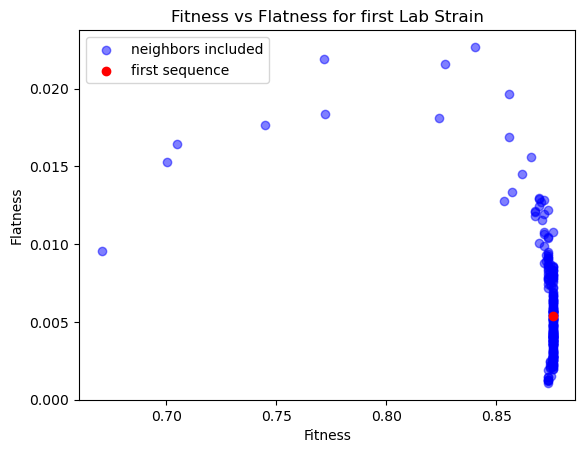

In [60]:
plt.scatter([x[0] for x in fit_flatt_list], [x[1] for x in fit_flatt_list], c='blue', alpha=0.5, label='neighbors included')
first_seq = fit_flatt_list[0]
plt.scatter([first_seq[0]], [first_seq[1]], c='red', alpha=1, label='first sequence')
plt.xlabel('Fitness')
plt.ylabel('Flatness')
plt.title('Fitness vs Flatness for first Lab Strain')
plt.legend()
plt.show()